**What hit songs should I add to the playlist for my dance party happening this weekend?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
music = pd.read_csv('Spotify_Youtube 2.csv')

Data Exploration

Analyze the popular song 'Timber' by Pitbull to set standards for hit party songs.

In [3]:
music.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
pitbull = music[music['Artist'] == 'Pitbull']

Get each base value for Pitbull songs: Energy and Loudness similar to Pitbull. Loudness is described in decibels.

In [5]:
pitbull['Energy'].mean()

0.8405000000000001

In [6]:
pitbull['Energy'].std()

0.11852261856334052

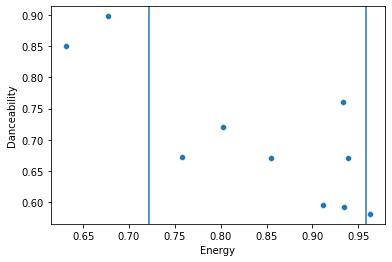

In [7]:
# interesting Danceability vs Energy graph -- lower energy songs are more danceable
sns.scatterplot(x='Energy', y='Danceability', data=pitbull)
plt.axvline(x=0.959)
plt.axvline(x=0.722)

In [8]:
pitbull['Loudness'].mean()

-4.7705

In [9]:
pitbull['Loudness'].std()

1.7180130157313191

0 decibels - threshold of human hearing, negative decibels mean how much softer than the threshhold the songs are.

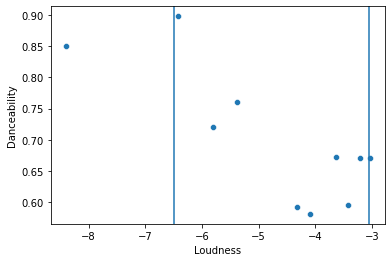

In [10]:
# interesting Danceability vs Loudness graph -- lower loudness songs are more danceable
sns.scatterplot(x='Loudness', y='Danceability', data=pitbull)
plt.axvline(x=-3.0525)
plt.axvline(x=-6.4885)

We want songs that are within 1 standard deviation from the mean -- which encompasses the majority of the Pitbull songs as seen in the graph

Energy = [0.722, 0.959]

Loudness = [-6.4885, -3.0525]

For Danceability, we want the higher the better.

Now, I need to grab songs that are within the range value of this Energy and Loudness.

In [11]:
energy = music[music['Energy'].between(0.722, 0.959, inclusive=True)]

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/633699921.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  energy = music[music['Energy'].between(0.722, 0.959, inclusive=True)]


In [12]:
energy_and_loud = energy[energy['Loudness'].between(-6.4885, -3.0525, inclusive=True)]

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/554387481.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  energy_and_loud = energy[energy['Loudness'].between(-6.4885, -3.0525, inclusive=True)]


Now, check if there are empty or N/A values within the dataset before scaling down. Also only get the columns needed.

Get columns Artist, Track, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, and Liveness

In [13]:
dataset = energy_and_loud[['Artist', 'Track', 'Danceability', 'Energy', 'Loudness','Acousticness', 'Speechiness', 'Instrumentalness', 'Liveness', 'Stream']]

In [14]:
dataset.isna().sum()

Artist                0
Track                 0
Danceability          0
Energy                0
Loudness              0
Acousticness          0
Speechiness           0
Instrumentalness      0
Liveness              0
Stream              133
dtype: int64

In [15]:
dataset.dropna(inplace=True)

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/2639109627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [16]:
len(dataset)

5259

Drop duplicates for songs

In [17]:
dataset.drop_duplicates(subset=['Track'], inplace=True)

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/3429869492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop_duplicates(subset=['Track'], inplace=True)


In [18]:
len(dataset)

4673

Get Pitbull songs

In [19]:
pitbull = dataset[dataset['Artist'].str.contains('Pitbull')]

In [20]:
pitbull

,Artist,Track,Danceability,Energy,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Stream
190,Pitbull,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...",0.671,0.939,-3.206,0.19100,0.1610,0.000000,0.2980,777641580.0
192,Pitbull,Time of Our Lives,0.721,0.802,-5.797,0.09210,0.0583,0.000000,0.6940,981156901.0
193,Pitbull,Feel This Moment (feat. Christina Aguilera),0.673,0.758,-3.632,0.03900,0.1580,0.000000,0.3410,481224452.0
195,Pitbull,Fireball (feat. John Ryan),0.761,0.933,-5.380,0.09080,0.0560,0.000085,0.0607,424022714.0
196,Pitbull,We Are One (Ole Ola) [The Official 2014 FIFA W...,0.592,0.935,-4.317,0.00879,0.0581,0.015400,0.1320,222056078.0
198,Pitbull,Hey Baby (Drop It to the Floor) (feat. T-Pain),0.595,0.912,-3.428,0.04340,0.0884,0.000000,0.2590,193172998.0


Get only the top popularity songs -- 20

In [21]:
dataset = dataset.sort_values(by='Stream', ascending=False).head(20)

In [22]:
dataset

,Artist,Track,Danceability,Energy,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Stream
15250,The Weeknd,Blinding Lights,0.514,0.730,-5.934,0.00146,0.0598,0.000095,0.0897,3.386520e+09
14030,Imagine Dragons,Believer,0.776,0.780,-4.374,0.06220,0.1280,0.000000,0.0810,2.369272e+09
14069,Justin Bieber,STAY (with Justin Bieber),0.591,0.764,-5.484,0.03830,0.0483,0.000000,0.1030,2.365778e+09
17950,Dua Lipa,Don't Start Now,0.793,0.793,-4.521,0.01230,0.0830,0.000000,0.0951,2.136271e+09
19128,Harry Styles,Watermelon Sugar,0.548,0.816,-4.209,0.12200,0.0465,0.000000,0.3350,2.096003e+09
17936,Post Malone,Circles,0.695,0.762,-3.497,0.19200,0.0395,0.002440,0.0863,1.958827e+09
15960,Travis Scott,goosebumps,0.841,0.728,-3.370,0.08470,0.0484,0.000000,0.1490,1.888028e+09
19126,Harry Styles,As It Was,0.520,0.731,-5.338,0.34200,0.0557,0.001010,0.3110,1.865476e+09
17237,Lil Uzi Vert,XO Tour Llif3,0.732,0.750,-6.366,0.00264,0.2310,0.000000,0.1090,1.827893e+09
13560,Avicii,Wake Me Up,0.532,0.783,-5.697,0.00380,0.0523,0.001200,0.1610,1.790784e+09


Combine pitbull and top popularity songs

In [23]:
dataset = dataset.append(pitbull)

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/1238558714.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(pitbull)


In [52]:
dataset

,Artist,Track,Danceability,Energy,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Stream
15250,The Weeknd,Blinding Lights,0.514,0.730,-5.934,0.00146,0.0598,0.000095,0.0897,3.386520e+09
14030,Imagine Dragons,Believer,0.776,0.780,-4.374,0.06220,0.1280,0.000000,0.0810,2.369272e+09
14069,Justin Bieber,STAY (with Justin Bieber),0.591,0.764,-5.484,0.03830,0.0483,0.000000,0.1030,2.365778e+09
17950,Dua Lipa,Don't Start Now,0.793,0.793,-4.521,0.01230,0.0830,0.000000,0.0951,2.136271e+09
19128,Harry Styles,Watermelon Sugar,0.548,0.816,-4.209,0.12200,0.0465,0.000000,0.3350,2.096003e+09
17936,Post Malone,Circles,0.695,0.762,-3.497,0.19200,0.0395,0.002440,0.0863,1.958827e+09
15960,Travis Scott,goosebumps,0.841,0.728,-3.370,0.08470,0.0484,0.000000,0.1490,1.888028e+09
19126,Harry Styles,As It Was,0.520,0.731,-5.338,0.34200,0.0557,0.001010,0.3110,1.865476e+09
17237,Lil Uzi Vert,XO Tour Llif3,0.732,0.750,-6.366,0.00264,0.2310,0.000000,0.1090,1.827893e+09
13560,Avicii,Wake Me Up,0.532,0.783,-5.697,0.00380,0.0523,0.001200,0.1610,1.790784e+09


Get the X and y set, where y is the song name & artist.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [25]:
X_set = dataset[['Danceability', 'Energy', 'Loudness','Acousticness', 'Speechiness', 'Instrumentalness', 'Liveness']]
y_set = dataset[['Artist', 'Track']]

Create a pipeline to reduce dimentions and perform clustering

In [26]:
pipes = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),
    ('agglomerative',AgglomerativeClustering(affinity='euclidean',linkage='average', n_clusters=4))
])

In [27]:
y_pred = pipes.fit_predict(X_set)

In [28]:
y_pred

array([1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2,
       0, 1, 3, 1])

In [29]:
y_set['Cluster'] = y_pred

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/3947307663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_set['Cluster'] = y_pred


In [30]:
y_set

,Artist,Track,Cluster
15250,The Weeknd,Blinding Lights,1
14030,Imagine Dragons,Believer,0
14069,Justin Bieber,STAY (with Justin Bieber),1
17950,Dua Lipa,Don't Start Now,0
19128,Harry Styles,Watermelon Sugar,2
17936,Post Malone,Circles,0
15960,Travis Scott,goosebumps,0
19126,Harry Styles,As It Was,2
17237,Lil Uzi Vert,XO Tour Llif3,0
13560,Avicii,Wake Me Up,1


In [31]:
y_set['pitbull'] = y_set.apply(lambda x:True if x['Artist'] == 'Pitbull' else False, axis=1)

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/1915651233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_set['pitbull'] = y_set.apply(lambda x:True if x['Artist'] == 'Pitbull' else False, axis=1)


In [32]:
y_set['Loudness'] = X_set['Loudness']

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/3291763160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_set['Loudness'] = X_set['Loudness']


In [33]:
y_set['Energy'] = X_set['Energy']

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/1807943590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_set['Energy'] = X_set['Energy']


Create a graph of the clusters

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255]),
 [Text(5, 0, '24'),
  Text(15, 0, '7'),
  Text(25, 0, '21'),
  Text(35, 0, '4'),
  Text(45, 0, '16'),
  Text(55, 0, '17'),
  Text(65, 0, '18'),
  Text(75, 0, '9'),
  Text(85, 0, '0'),
  Text(95, 0, '2'),
  Text(105, 0, '25'),
  Text(115, 0, '15'),
  Text(125, 0, '11'),
  Text(135, 0, '23'),
  Text(145, 0, '6'),
  Text(155, 0, '22'),
  Text(165, 0, '12'),
  Text(175, 0, '14'),
  Text(185, 0, '5'),
  Text(195, 0, '20'),
  Text(205, 0, '10'),
  Text(215, 0, '8'),
  Text(225, 0, '19'),
  Text(235, 0, '13'),
  Text(245, 0, '1'),
  Text(255, 0, '3')])

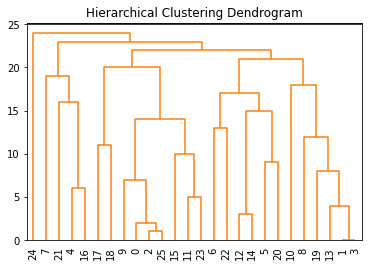

In [57]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    # Draw a horizontal line at our cutoff 
    color_threshold = kwargs.pop('color_threshold',None)
    plt.axhline(y=color_threshold,c='k')

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(pipes.named_steps.agglomerative, color_threshold=25)
plt.xticks(rotation=90)

In [82]:
explained_variance_ratio = pipes.named_steps['pca'].explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
variance_retained = cumulative_variance_ratio[1] * 100
print(f'Percentage of Variance Retained in 5D PCA: {variance_retained:.2f}%')

Percentage of Variance Retained in 5D PCA: 41.04%


In [62]:
# dendrogram x axis came out labeled as index of y_set, convert the dendrogram labels to artist names
y_set.reset_index(inplace=True)
y_set

,level_0,index,Artist,Track,Cluster,pitbull,Loudness,Energy
0,0,15250,The Weeknd,Blinding Lights,1,False,-5.934,0.730
1,1,14030,Imagine Dragons,Believer,0,False,-4.374,0.780
2,2,14069,Justin Bieber,STAY (with Justin Bieber),1,False,-5.484,0.764
3,3,17950,Dua Lipa,Don't Start Now,0,False,-4.521,0.793
4,4,19128,Harry Styles,Watermelon Sugar,2,False,-4.209,0.816
5,5,17936,Post Malone,Circles,0,False,-3.497,0.762
6,6,15960,Travis Scott,goosebumps,0,False,-3.370,0.728
7,7,19126,Harry Styles,As It Was,2,False,-5.338,0.731
8,8,17237,Lil Uzi Vert,XO Tour Llif3,0,False,-6.366,0.750
9,9,13560,Avicii,Wake Me Up,1,False,-5.697,0.783


In [75]:
y_set['short_title'] = y_set['Track'].str.split('(', expand=True)[0]
y_set

/var/folders/0w/prnzlpwd31bd7gyph3p1vl480000gn/T/ipykernel_39576/870890040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_set['short_title'] = y_set['Track'].str.split('(', expand=True)[0]


,level_0,index,Artist,Track,Cluster,pitbull,Loudness,Energy,short_title
0,0,15250,The Weeknd,Blinding Lights,1,False,-5.934,0.730,Blinding Lights
1,1,14030,Imagine Dragons,Believer,0,False,-4.374,0.780,Believer
2,2,14069,Justin Bieber,STAY (with Justin Bieber),1,False,-5.484,0.764,STAY
3,3,17950,Dua Lipa,Don't Start Now,0,False,-4.521,0.793,Don't Start Now
4,4,19128,Harry Styles,Watermelon Sugar,2,False,-4.209,0.816,Watermelon Sugar
5,5,17936,Post Malone,Circles,0,False,-3.497,0.762,Circles
6,6,15960,Travis Scott,goosebumps,0,False,-3.370,0.728,goosebumps
7,7,19126,Harry Styles,As It Was,2,False,-5.338,0.731,As It Was
8,8,17237,Lil Uzi Vert,XO Tour Llif3,0,False,-6.366,0.750,XO Tour Llif3
9,9,13560,Avicii,Wake Me Up,1,False,-5.697,0.783,Wake Me Up


In [76]:
artist = list(y_set.apply(lambda x: x['Artist'] + ' - ' + x['short_title'], axis=1))
artist

['The Weeknd - Blinding Lights',
 'Imagine Dragons - Believer',
 'Justin Bieber - STAY ',
 "Dua Lipa - Don't Start Now",
 'Harry Styles - Watermelon Sugar',
 'Post Malone - Circles',
 'Travis Scott - goosebumps',
 'Harry Styles - As It Was',
 'Lil Uzi Vert - XO Tour Llif3',
 'Avicii - Wake Me Up',
 'Travis Scott - SICKO MODE',
 "Macklemore - Can't Hold Us ",
 'Justin Bieber - Sorry',
 'Calvin Harris - One Kiss ',
 'DJ Snake - Lean On',
 'Shawn Mendes - Treat You Better',
 'Post Malone - Congratulations',
 "The Chainsmokers - Don't Let Me Down",
 'The Killers - Mr. Brightside',
 'Dua Lipa - Levitating ',
 'Pitbull - Give Me Everything ',
 'Pitbull - Time of Our Lives',
 'Pitbull - Feel This Moment ',
 'Pitbull - Fireball ',
 'Pitbull - We Are One ',
 'Pitbull - Hey Baby ']

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255]),
 [Text(5, 0, 'Pitbull - We Are One '),
  Text(15, 0, 'Harry Styles - As It Was'),
  Text(25, 0, 'Pitbull - Time of Our Lives'),
  Text(35, 0, 'Harry Styles - Watermelon Sugar'),
  Text(45, 0, 'Post Malone - Congratulations'),
  Text(55, 0, "The Chainsmokers - Don't Let Me Down"),
  Text(65, 0, 'The Killers - Mr. Brightside'),
  Text(75, 0, 'Avicii - Wake Me Up'),
  Text(85, 0, 'The Weeknd - Blinding Lights'),
  Text(95, 0, 'Justin Bieber - STAY '),
  Text(105, 0, 'Pitbull - Hey Baby '),
  Text(115, 0, 'Shawn Mendes - Treat You Better'),
  Text(125, 0, "Macklemore - Can't Hold Us "),
  Text(135, 0, 'Pitbull - Fireball '),
  Text(145, 0, 'Travis Scott - goosebumps'),
  Text(155, 0, 'Pitbull - Feel This Moment '),
  Text(165, 0, 'Justin Bieber - Sorry'),
  Text(175, 0, 'DJ Snake - Lean On'),
  Text(185, 0, 'Post Malone - Circles'),
  Text(195,

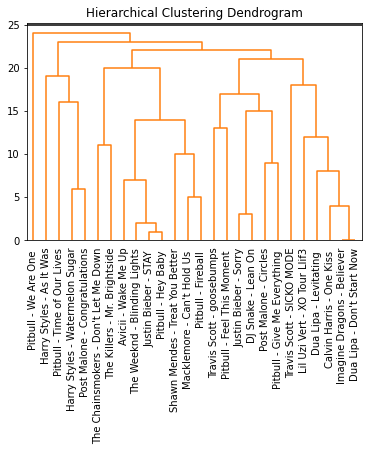

In [77]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    # Draw a horizontal line at our cutoff 
    color_threshold = kwargs.pop('color_threshold',None)
    plt.axhline(y=color_threshold,c='k')

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(pipes.named_steps.agglomerative, labels = artist, color_threshold=25)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Visualizing the Number of Pitbull Songs in Each Cluster')

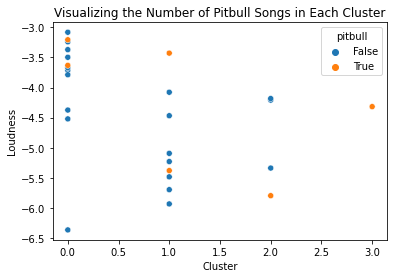

In [ ]:
sns.scatterplot(y='Loudness', x='Cluster', hue='pitbull', data=y_set)
plt.title('Visualizing the Number of Pitbull Songs in Each Cluster')

<AxesSubplot:xlabel='Cluster', ylabel='Energy'>

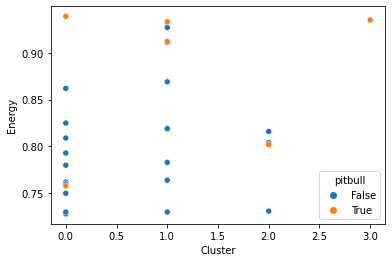

In [ ]:
sns.scatterplot(y='Energy', x='Cluster', hue='pitbull', data=y_set)

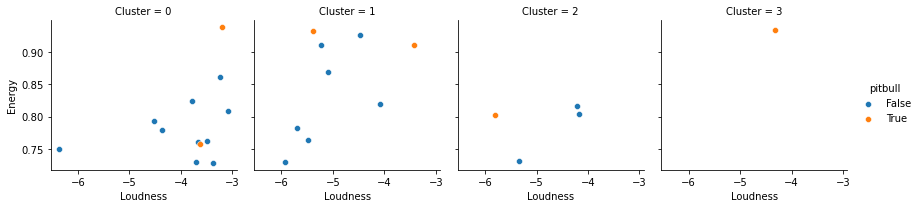

In [ ]:
g = sns.FacetGrid(y_set, col="Cluster", hue="pitbull")
g.map(sns.scatterplot, "Loudness", "Energy")
g.add_legend()

In [59]:
y_set

,Artist,Track,Cluster,pitbull,Loudness,Energy
15250,The Weeknd,Blinding Lights,1,False,-5.934,0.730
14030,Imagine Dragons,Believer,0,False,-4.374,0.780
14069,Justin Bieber,STAY (with Justin Bieber),1,False,-5.484,0.764
17950,Dua Lipa,Don't Start Now,0,False,-4.521,0.793
19128,Harry Styles,Watermelon Sugar,2,False,-4.209,0.816
17936,Post Malone,Circles,0,False,-3.497,0.762
15960,Travis Scott,goosebumps,0,False,-3.370,0.728
19126,Harry Styles,As It Was,2,False,-5.338,0.731
17237,Lil Uzi Vert,XO Tour Llif3,0,False,-6.366,0.750
13560,Avicii,Wake Me Up,1,False,-5.697,0.783


Songs in cluster 0 and 1 are the most similar to pitbull songs

In [ ]:
recommended_songs = y_set[y_set['Cluster'].isin([0,1])]

In [ ]:
recommended_songs = recommended_songs[recommended_songs['pitbull'] == False]

In [ ]:
recommended_songs

,Artist,Track,Cluster,pitbull,Loudness,Energy
15250,The Weeknd,Blinding Lights,1,False,-5.934,0.730
14030,Imagine Dragons,Believer,0,False,-4.374,0.780
14069,Justin Bieber,STAY (with Justin Bieber),1,False,-5.484,0.764
17950,Dua Lipa,Don't Start Now,0,False,-4.521,0.793
17936,Post Malone,Circles,0,False,-3.497,0.762
15960,Travis Scott,goosebumps,0,False,-3.370,0.728
17237,Lil Uzi Vert,XO Tour Llif3,0,False,-6.366,0.750
13560,Avicii,Wake Me Up,1,False,-5.697,0.783
15962,Travis Scott,SICKO MODE,0,False,-3.714,0.730
12018,Macklemore,Can't Hold Us (feat. Ray Dalton),1,False,-4.468,0.927


In [ ]:
# getting rid of the datapoints that are not near the pitbull songs
y_set = y_set[y_set['Loudness'] >= -6]

In [ ]:
# remove lowest 3
y_set[y_set['Cluster'] == 1].sort_values(by='Loudness', ascending=False)

,Artist,Track,Cluster,pitbull,Loudness,Energy
198,Pitbull,Hey Baby (Drop It to the Floor) (feat. T-Pain),1,True,-3.428,0.912
17286,Shawn Mendes,Treat You Better,1,False,-4.078,0.819
12018,Macklemore,Can't Hold Us (feat. Ray Dalton),1,False,-4.468,0.927
16100,The Chainsmokers,Don't Let Me Down,1,False,-5.094,0.869
10626,The Killers,Mr. Brightside,1,False,-5.230,0.911
195,Pitbull,Fireball (feat. John Ryan),1,True,-5.380,0.933
14069,Justin Bieber,STAY (with Justin Bieber),1,False,-5.484,0.764
13560,Avicii,Wake Me Up,1,False,-5.697,0.783
15250,The Weeknd,Blinding Lights,1,False,-5.934,0.730


In [ ]:
final_set = y_set[y_set.Artist.isin(['Justin Bieber', 'Avicii', 'The Weeknd']) == False]

In [ ]:
final_set = final_set[final_set['Artist'] != 'Pitbull']

In [ ]:
final_set

,Artist,Track,Cluster,pitbull,Loudness,Energy
14030,Imagine Dragons,Believer,0,False,-4.374,0.780
17950,Dua Lipa,Don't Start Now,0,False,-4.521,0.793
19128,Harry Styles,Watermelon Sugar,2,False,-4.209,0.816
17936,Post Malone,Circles,0,False,-3.497,0.762
15960,Travis Scott,goosebumps,0,False,-3.370,0.728
19126,Harry Styles,As It Was,2,False,-5.338,0.731
15962,Travis Scott,SICKO MODE,0,False,-3.714,0.730
12018,Macklemore,Can't Hold Us (feat. Ray Dalton),1,False,-4.468,0.927
12479,Calvin Harris,One Kiss (with Dua Lipa),0,False,-3.240,0.862
15393,DJ Snake,Lean On,0,False,-3.081,0.809
